# Comparison of Unsupervised Clustering Algorithms with Supervised Machine Learning Techniques

In [493]:
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import required sklearn packages
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
import sklearn.metrics as sm
from sklearn import ensemble
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

In [494]:
# load in iris dataset from sklearn package
iris = datasets.load_iris()
# Create dataframe with data and assign column names
df = pd.DataFrame(iris.data)
df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
df['Target'] = iris.target
# Print species names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [495]:
# Define function to assign species names to each target number for plots
def add_species(x):
    if x['Target']  == 0:
        return 'Setosa'
    elif x['Target'] == 1:
        return 'Versicolor'
    elif x['Target'] == 2:
        return 'Virginica'
    
# Add species names in new column
df['Species'] = df.apply(add_species, axis=1)

In [496]:
# Print first 5 rows of data and print length of df
print("This dataset consists of {} observations".format(len(df)))
df.head(n=5)

This dataset consists of 150 observations


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Target,Species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [497]:
# Describe Data
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


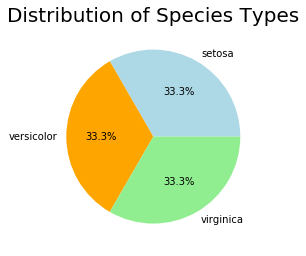

In [498]:
# Create pie chart comparing relative amounts of each species type
counts = pd.value_counts(df['Species'])
plt.pie(counts,labels=(iris.target_names),colors=('lightblue','orange','lightgreen'),autopct='%1.1f%%')
plt.title("Distribution of Species Types",size=20)
plt.show()

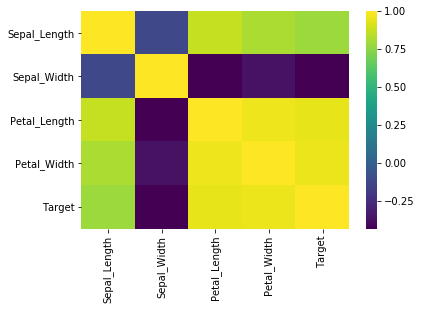

In [499]:
# Create Heatmap of data
sns.heatmap(df.corr(),cmap='viridis')

Text(0.5, 1.0, 'Petal Size by Species')

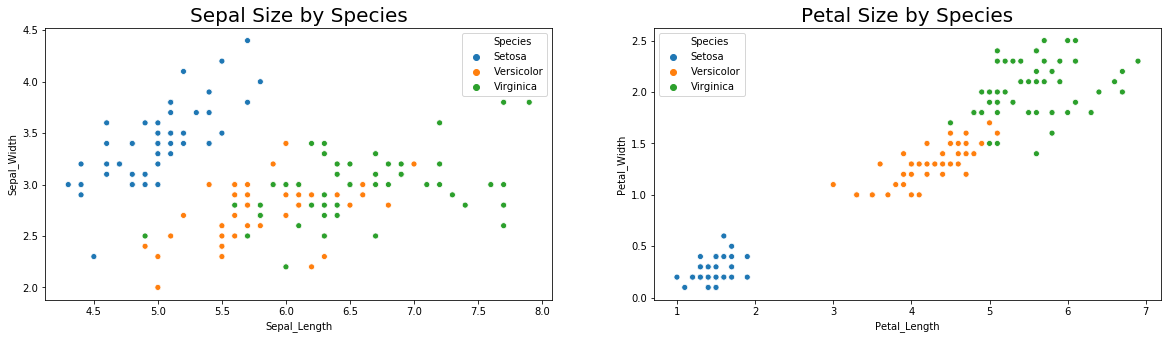

In [500]:
# Create plots showing groupings of data by species of iris
plt.figure(figsize=(20,5))

# Plot sepal size by species
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Sepal_Length'],y=df['Sepal_Width'],hue=df['Species'],data=df)
plt.title('Sepal Size by Species',size=20)
 
# Plot petal size by species  
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Petal_Length'],y=df['Petal_Width'],hue=df['Species'],data=df)
plt.title('Petal Size by Species',size=20)

Text(0.5, 1.0, 'Sepal Width (cm)')

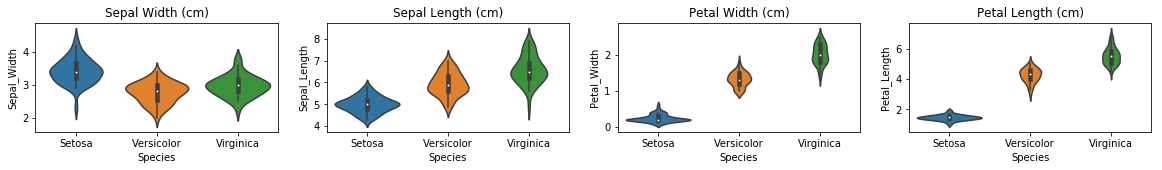

In [501]:
# Create violin plots of each measurement by species type 
f = plt.figure(figsize=(20,2))
plt.subplot(144)
sns.violinplot(x='Species', y='Petal_Length', data=df)
plt.title('Petal Length (cm)')
plt.subplot(143)
sns.violinplot(x='Species', y='Petal_Width', data=df)
plt.title('Petal Width (cm)')
plt.subplot(142)
sns.violinplot(x='Species', y='Sepal_Length', data=df)
plt.title('Sepal Length (cm)')
plt.subplot(141)
sns.violinplot(x='Species', y='Sepal_Width', data=df)
plt.title('Sepal Width (cm)')

In [502]:
# Seperate into X and Y Variables
X = df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]
Y = df[['Target']]

In [607]:
# Define function to compare actual clusters with predicted clusters
def compare_clusters():
    # Plot Model results vs actual results
    plt.subplot(221)
    plt.scatter(df['Petal_Length'], df['Petal_Width'], c=Y['Target'])
    plt.title('Real Classification')
# Plot the Models Classifications
    plt.subplot(222)
    plt.scatter(df['Petal_Length'], df['Petal_Width'], c=Y_pred)
    plt.title('Model Classification')
# Plot the Original Classifications
    plt.subplot(223)
    plt.scatter(df['Sepal_Length'], df['Sepal_Width'], c=Y['Target'])
# Plot the Models Classifications
    plt.subplot(224)
    plt.scatter(df['Sepal_Length'], df['Sepal_Width'], c=Y_pred)
    plt.show()
# Print accuracy and confusion matrix of results
    score = round(sm.accuracy_score(Y['Target'],Y_pred)*100,2)
    print('This clustering algorithm acccurately assigned {}% of the iris species'.format(score))
    print('''''')
    results = pd.DataFrame(sm.confusion_matrix(Y['Target'],Y_pred))
    results.index = iris.target_names
    results.columns = iris.target_names 
    return results

In [614]:
# Define function to append results from clustering model for comparison

# Create variables to store values from models in
clustering_accuracy = []
execution_time = []

def append_results(model):
    # Time model fit time
    start = timeit.default_timer()
    model.fit(X)
    stop = timeit.default_timer()
    time = stop-start
    execution_time.append(time)
    # Calculate Accuracy and Append
    accuracy = sm.accuracy_score(Y['Target'],Y_pred)
    clustering_accuracy.append(round(accuracy*100,2))

# Clustering Algorithms: K-Means

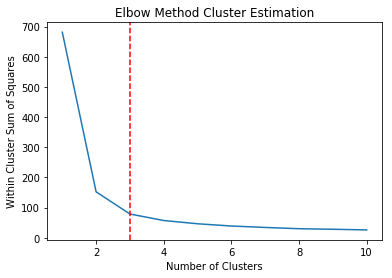

In [609]:
#Finding the optimum number of clusters for k-means classification using 'elbow method'
values = []

for num in range(1, 11):
    kmeans = KMeans(n_clusters = num, init = 'k-means++', n_init = 10, random_state = 0)
    kmeans.fit(X)
    values.append(kmeans.inertia_)
    
#Plotting the results onto a line graph
plt.plot(range(1, 11), values)
plt.title('Elbow Method Cluster Estimation')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares') 
# Looks like the plot levels out at 3 so that will be the number of clusters used
plt.axvline(3,color='r',linestyle='--')
plt.show()

In [612]:
# Fit Model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# Assign cluster numbers to predicted clusters
Y_pred = np.choose(kmeans.labels_, [0, 1, 2]).astype(np.int64)

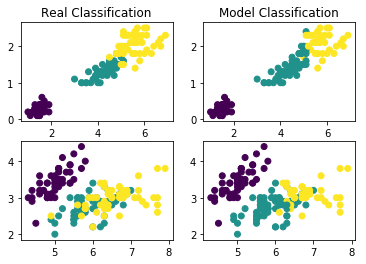

This clustering algorithm acccurately assigned 89.33% of the iris species



,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [613]:
compare_clusters()

In [615]:
# Store results from model
append_results(kmeans)

# Clustering Algorithms: Mean Shift

In [593]:
# Estimate Bandwidth
bandwidth = estimate_bandwidth(X)
print(bandwidth)

1.2020768127998687


In [616]:
# Fit model using bandwidth calculated above
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)
# Assign cluster numbers to predicted clusters
Y_pred = np.choose(ms.labels_, [1, 0, 2]).astype(np.int64)

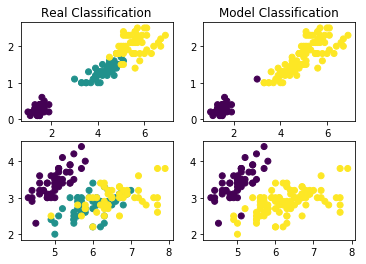

This clustering algorithm acccurately assigned 66.0% of the iris species



,setosa,versicolor,virginica
setosa,50,0,0
versicolor,1,49,0
virginica,0,50,0


In [617]:
compare_clusters()

In [ ]:
# This clustering model completely misses one class of iris, most
# likely due to the fact that the two clusters are very close to each other
# causing the clustering algorithm to identify these as one cluster

In [618]:
# Store results from model
append_results(ms)

# Clustering Algorithm: Spectral Affinity

In [568]:
# Model Optimization

# Run spectral clustering model for multiple k values
for k in np.arange(3, 7, 1):
    sc = SpectralClustering(n_clusters=k, random_state=42).fit(X)
    labels = sc.labels_
    silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
    print('for K={}: silhouette: {}'.format(k, round(silhouette,4)))

for K=3: silhouette: 0.5553
for K=4: silhouette: 0.4917
for K=5: silhouette: 0.4539
for K=6: silhouette: 0.3377


In [621]:
# Run spectral clustering model for 3 clusters
sc = SpectralClustering(n_clusters=3)
sc.fit(X)
# Assign cluster numbers to predicted clusters
Y_pred = np.choose(sc.labels_, [1, 0, 2]).astype(np.int64)

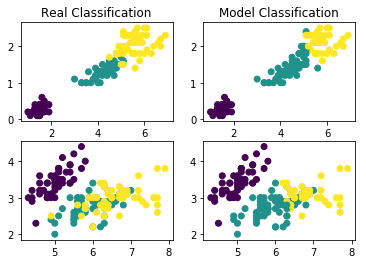

This clustering algorithm acccurately assigned 90.0% of the iris species



,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,50,0
virginica,0,15,35


In [622]:
compare_clusters()

In [623]:
# Store model results
append_results(sc)

In [624]:
# Collect clustering results into one dataframe
models = ['K-Means','Mean Shift','Spectral Affinity']
clust_results = pd.DataFrame(index=models)
clust_results['Model Accuracy (%)'] = clustering_accuracy
clust_results['Runtime (Seconds)'] = execution_time

In [625]:
# Display results of clustering algorithms
clust_results

,Model Accuracy (%),Runtime (Seconds)
K-Means,89.33,0.032747
Mean Shift,66.00,0.196203
Spectral Affinity,90.00,0.077981


# Comparison with Other Machine Learning Algorithms

In [626]:
# Define Function to evaluate models below

# Create variables to store values from models in
model_accuracy = []
cross_val_accuracy = []
runtime = []

def test_model(regression):
# Fit model and time it
    start = timeit.default_timer()
    regression.fit(X,Y['Target'])
    stop = timeit.default_timer()
    time = stop-start
# Generate Confusion Matrix
    y_pred = regression.predict(X)
    results = pd.DataFrame(sm.confusion_matrix(Y['Target'],y_pred))
    results.index = iris.target_names
    results.columns = iris.target_names 
# Calculate 5 Fold Cross Validation Accuracy
    score = cross_val_score(regression,X,Y['Target'],cv=5)
    cross_val_accuracy.append(round(score.mean()*100,2))
# Calculate Predictive Accuracy
    df1 = pd.DataFrame()
    df1['Actual_Values'] = Y['Target']
    df1['Predicted_Values'] = y_pred 
    df2 = df1[df1['Actual_Values']==df1['Predicted_Values']]
    model_accuracy.append(round((len(df2)/len(df1))*100,2))
    runtime.append(time)
# Print Results
    cv_results = round(pd.DataFrame(score*100),2)
    cv_results.columns = ['5 Fold Cross Validation Results']
    cv_results.index = ['','','','','']
    print(cv_results)
    print('''''')
    print("Average 5 Fold Cross Validation Predictive Accuracy: {}%".format(round(score.mean()*100,2)))
    print('''''')
    print('{} predicted correctly out of {} from training set'.format(len(df2),len(df1)))
    print('''''')
    print('Training Set Predictive Accuracy: {}%'.format(round((len(df2)/len(df1))*100),2))
    return results

In [627]:
# Optimization of K-Neighbors model

# Run K neighbors model for different #s of neighbors
for n in np.arange(2,10,1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X,Y['Target'])
    Y_pred = knn.predict(X)
    print(sm.accuracy_score(Y['Target'],Y_pred))
# Looks like 2 neighbors is the simplest way to get the best results

0.98
0.96
0.96
0.9666666666666667
0.9733333333333334
0.9733333333333334
0.98
0.98


In [628]:
# K Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=2)
test_model(knn)

  5 Fold Cross Validation Results
                            96.67
                            93.33
                            93.33
                            90.00
                           100.00

Average 5 Fold Cross Validation Predictive Accuracy: 94.67%

147 predicted correctly out of 150 from training set

Training Set Predictive Accuracy: 98%


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,50,0
virginica,0,3,47


In [629]:
# Support Vector Classifier Model 
svm_class = svm.SVC(gamma='auto')
test_model(svm_class)

  5 Fold Cross Validation Results
                            96.67
                           100.00
                            96.67
                            96.67
                           100.00

Average 5 Fold Cross Validation Predictive Accuracy: 98.0%

148 predicted correctly out of 150 from training set

Training Set Predictive Accuracy: 99%


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,0,50


In [630]:
# Neural Networks, most effective model found is three levels 10 deep 
# Less than 10,000 max iterations failed to converge and produced bad results
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000)  
test_model(mlp)

  5 Fold Cross Validation Results
                           100.00
                            96.67
                            96.67
                            96.67
                           100.00

Average 5 Fold Cross Validation Predictive Accuracy: 98.0%

147 predicted correctly out of 150 from training set

Training Set Predictive Accuracy: 98%


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49


In [631]:
# Decision Tree Classifier - Max depth of 5 is lowest # w/ best results
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                max_depth=5)
test_model(dt)

  5 Fold Cross Validation Results
                            96.67
                            96.67
                            90.00
                            93.33
                           100.00

Average 5 Fold Cross Validation Predictive Accuracy: 95.33%

150 predicted correctly out of 150 from training set

Training Set Predictive Accuracy: 100%


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


In [632]:
# Random Forest Classifier - results shift within single number of estimators - 7 seems to be most effective though
rfc = ensemble.RandomForestClassifier(n_estimators=7)
test_model(rfc)

  5 Fold Cross Validation Results
                            96.67
                            96.67
                            93.33
                            90.00
                           100.00

Average 5 Fold Cross Validation Predictive Accuracy: 95.33%

148 predicted correctly out of 150 from training set

Training Set Predictive Accuracy: 99%


,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,49,1
virginica,0,1,49


In [636]:
# Collect results from models into one dataframe
models = ['K Nearest Neighbors','SVC','Neural Networks','Decision Tree', 'Random Forest']
results = pd.DataFrame(index=models)
results['Model Accuracy (%)'] = model_accuracy
results['Average 5 Fold Cross Validation Accuracy (%)'] = cross_val_accuracy
results['Runtime (Seconds)'] = runtime

In [637]:
# Sort results by runtime and display
results.sort_values(by='Runtime (Seconds)',ascending=True)

,Model Accuracy (%),Average 5 Fold Cross Validation Accuracy (%),Runtime (Seconds)
K Nearest Neighbors,98.00,94.67,0.001737
Decision Tree,100.00,95.33,0.003998
SVC,98.67,98.00,0.004190
Random Forest,98.67,95.33,0.011395
Neural Networks,98.00,98.00,0.994017


In [638]:
# Compare with clustering algorithm results
clust_results.sort_values(by='Runtime (Seconds)',ascending=True)

,Model Accuracy (%),Runtime (Seconds)
K-Means,89.33,0.032747
Spectral Affinity,90.00,0.077981
Mean Shift,66.00,0.196203


# Overall the supervised machine learning models seemed to perform better than the clustering algorithms tested, both in terms of runtime and overall accuracy of results.  The Neural Networks seemed to produce the most accuracte resutls although the results from the model changed slightly each time the model was run. Furthermore the neural networks model took the longest out of any of the models to run.  Because of this I would say that the support vector classifier was the most effective model out of the models tested for this dataset.